In [1]:
# komentari o kombinaciji oversamplinga i undersaplinga

In [2]:
%run preprocessing_ccfd.ipynb

In [3]:
%run functions.ipynb

In [37]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [5]:
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
over_sampler = RandomOverSampler(sampling_strategy=0.1)
smote_sampler = SMOTE(sampling_strategy=0.1)

## Logistička regresija

In [13]:
over_under_log_reg = LogisticRegression(solver='liblinear')

time_ov_und_log_reg_start = time.time()
over_under_pipeline_log_reg = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_log_reg)
over_under_model_log_reg = over_under_pipeline_log_reg.fit(X_data_train, y_data_train)

training_over_under_log_reg_score = cross_val_score(over_under_pipeline_log_reg, X_data_train, y_data_train, cv=rskf)
time_ov_und_log_reg_end = time.time()
print('Logistička regresija (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za logističku regresiju sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_log_reg_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening logističke regresije (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_log_reg_end-time_ov_und_log_reg_start, 2)) + ' seconds')

Logistička regresija (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za logističku regresiju sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 98.83%
Vrijeme potrebno za trening logističke regresije (sa kombinacijom undersamplinga i oversamplinga): 19.89 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 12.379999999999999%
	Recall score: 90.82000000000001%
	F1 score: 21.790000000000003%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


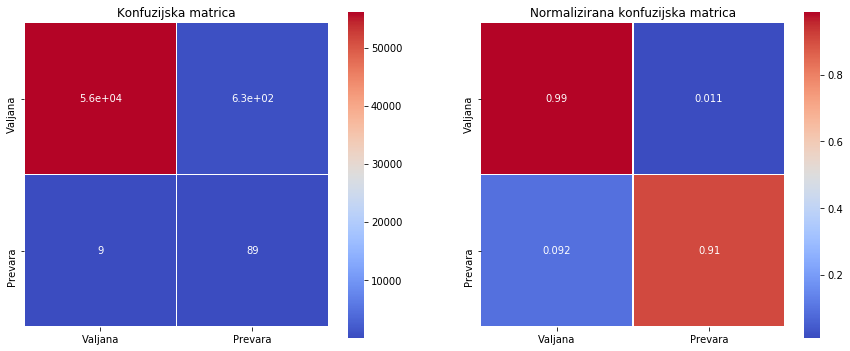

----------------------------------------------------------------------------------------------------


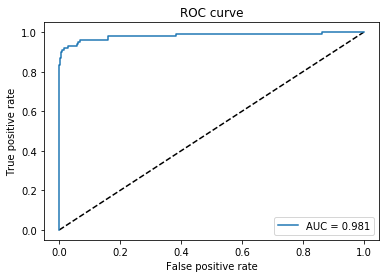

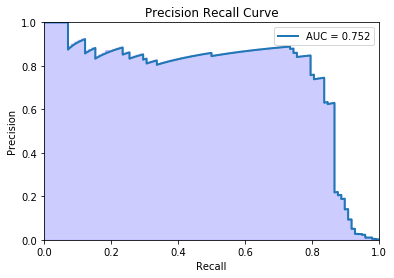

In [14]:
over_under_pred_log_reg = over_under_model_log_reg.predict(X_data_test)
over_under_score_log_reg = over_under_model_log_reg.decision_function(X_data_test)
print_everything(y_data_test, over_under_pred_log_reg, y_data_test_non_fraud_num, y_data_test_fraud_num, over_under_score_log_reg, True)

Vidimo da smo kombinacijom undersamplinga i oversamplinga dobili generalno nešto bolje rezultate nego kad smo koristili samo undersampling, odnosno oversampling. Odnosno iako je osjetljivost malo niža (90.82%), i preciznost (12.38%) i f1-mjera (21.79%) su dosta više. Iz matrice konfuzije vidimo da je ispravno klasificirano 89 prevara, dok je  pogrešno klasificirano svega oko 630 valjanih transakcija.

In [15]:
smote_under_log_reg = LogisticRegression(solver='liblinear')

time_sm_und_log_reg_start = time.time()
smote_under_pipeline_log_reg = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_log_reg)
smote_under_model_log_reg = smote_under_pipeline_log_reg.fit(X_data_train, y_data_train)

training_smote_under_log_reg_score = cross_val_score(smote_under_pipeline_log_reg, X_data_train, y_data_train, cv=rskf)
time_sm_und_log_reg_end = time.time()
print('Logistička regresija (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za logističku regresiju sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_log_reg_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening logističke regresije (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_log_reg_end-time_sm_und_log_reg_start, 2)) + ' seconds')

Logistička regresija (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za logističku regresiju sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 98.79%
Vrijeme potrebno za trening logističke regresije (sa kombinacijom undersamplinga i SMOTE-a): 21.38 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 11.72%
	Recall score: 91.84%
	F1 score: 20.79%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.92      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


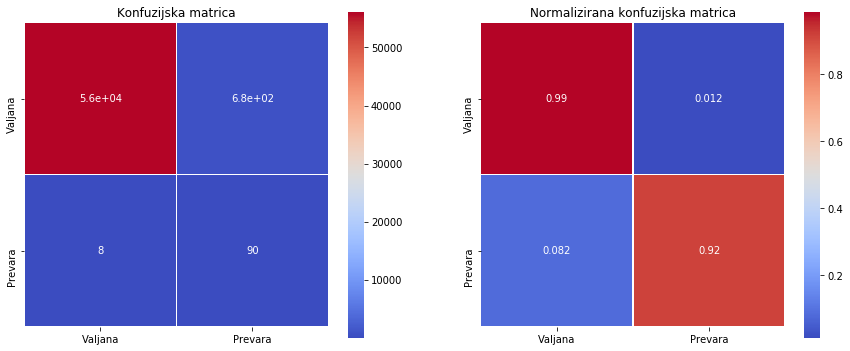

----------------------------------------------------------------------------------------------------


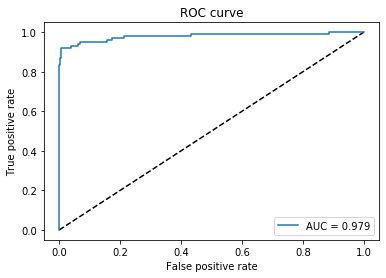

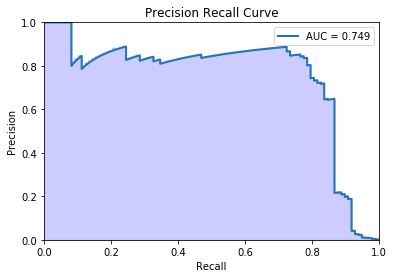

In [16]:
smote_under_pred_log_reg = smote_under_model_log_reg.predict(X_data_test)
smote_under_score_log_reg = smote_under_model_log_reg.decision_function(X_data_test)
print_everything(y_data_test, smote_under_pred_log_reg, y_data_test_non_fraud_num, y_data_test_fraud_num, smote_under_score_log_reg, True)

Korištenjem kombinacije nasumičnog undersamplinga i SMOTE-a dobili smo možda i bolje rezultate. Iako su preciznost (11.72%) i f1-mjera (20.79%) nešto niže, osjetljivost je viša (91.84%). Odnosno, iz matrice konfuzije vidimo da je ispravno klasificirana 1 prevara više (ukupno 90 ispravnih), ali je pogrešno klasificirano 50ak valjanih transakcija više.

In [ ]:
smote_tomek_sampler = SMOTETomek(smote=smote_sampler, tomek=TomekLinks(sampling_strategy='majority'))
smote_enn_sampler = SMOTEENN(smote=smote_sampler, enn=EditedNearestNeighbours(sampling_strategy=0.5))

In [ ]:
smote_tomek_log_reg = LogisticRegression(solver='liblinear')

time_sm_tom_log_reg_start = time.time()
smote_tomek_pipeline_log_reg = imbalanced_make_pipeline(smote_tomek_sampler, smote_tomek_log_reg)
smote_tomek_model_log_reg = smote_tomek_pipeline_log_reg.fit(X_data_train, y_data_train)

training_smote_tomek_log_reg_score = cross_val_score(smote_tomek_pipeline_log_reg, X_data_train, y_data_train, cv=rskf)
time_sm_tom_log_reg_end = time.time()
print('Logistička regresija (sa kombinacijom SMOTE-a i Tomekovih veza)')

print('Rezultat treniranja za logističku regresiju sa kombinacijom SMOTE-a i Tomekovih veza: ' 
     + str(round(training_smote_tomek_log_reg_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening logističke regresije (sa kombinacijom SMOTE-a i Tomekovih veza): ' + 
      str(round(time_sm_tom_log_reg_end-time_sm_tom_log_reg_start, 2)) + ' seconds')

In [40]:
smote_tomek_pred_log_reg = smote_tomek_model_log_reg.predict(X_data_test)
smote_tomek_score_log_reg = smote_tomek_model_log_reg.decision_function(X_data_test)
print_everything(y_data_test, smote_tomek_pred_log_reg, y_data_test_non_fraud_num, y_data_test_fraud_num, smote_tomek_score_log_reg, True)

NameError: name 'smote_tomek_model_log_reg' is not defined

In [2]:
#smoteenn

## Stabla odluke

In [18]:
over_under_dt = DecisionTreeClassifier()

time_ov_und_dt_start = time.time()
over_under_pipeline_dt = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_dt)
over_under_model_dt = over_under_pipeline_dt.fit(X_data_train, y_data_train)

training_over_under_dt_score = cross_val_score(over_under_pipeline_dt, X_data_train, y_data_train, cv=rskf)
time_ov_und_dt_end = time.time()
print('Stabla odluke (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za stabla odluke sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_dt_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening stabla odluke (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_dt_end-time_ov_und_dt_start, 2)) + ' seconds')

Stabla odluke (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za stabla odluke sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 99.8%
Vrijeme potrebno za trening stabla odluke (sa kombinacijom undersamplinga i oversamplinga): 43.04 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 54.93%
	Recall score: 79.59%
	F1 score: 65.0%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.80      0.65        98

    accuracy                           1.00     56962
   macro avg       0.77      0.90      0.82     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


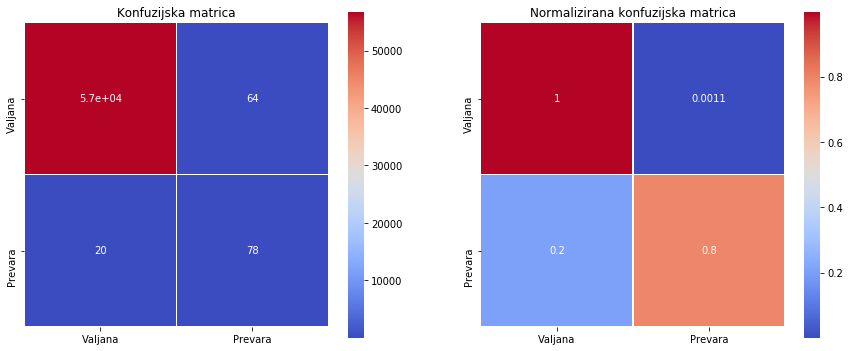

----------------------------------------------------------------------------------------------------


In [20]:
over_under_pred_dt = over_under_model_dt.predict(X_data_test)
print_everything(y_data_test, over_under_pred_dt, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Korištenjem kombinacije nasumičnog oversamplinga i undersamplinga nismo dobili bolje rezultate nego koje smo imali trenirajući bez ikakvog samplinga (imamo malo više pogrešno klasificiranih valjanih transakcija). Prednost je što je trening bio znantno brži nego kad nismo proveli nikakav sampling. 

In [22]:
smote_under_dt = DecisionTreeClassifier()

time_sm_und_dt_start = time.time()
smote_under_pipeline_dt = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_dt)
smote_under_model_dt = smote_under_pipeline_dt.fit(X_data_train, y_data_train)
smote_under_pred_dt = smote_under_model_dt.predict(X_data_test)

training_smote_under_dt_score = cross_val_score(smote_under_pipeline_dt, X_data_train, y_data_train, cv=rskf)
time_sm_und_dt_end = time.time()
print('Stabla odluke (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za stabla odluke sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_dt_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening stabla odluke (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_dt_end-time_sm_und_dt_start, 2)) + ' seconds')

Stabla odluke (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za stabla odluke sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 99.17%
Vrijeme potrebno za trening stabla odluke (sa kombinacijom undersamplinga i SMOTE-a): 68.07 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 15.939999999999998%
	Recall score: 78.57%
	F1 score: 26.51%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.79      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


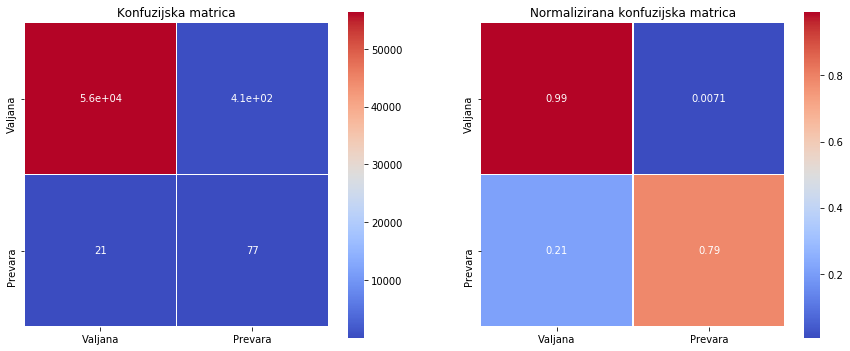

----------------------------------------------------------------------------------------------------


In [23]:
smote_under_pred_dt = smote_under_model_dt.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_dt, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Korištenjem SMOTE-a i nasumičnog undersamplinga dobili smo dosta loš model. Pogrešno je klasificirano čak 21 prevara, te oko 410 valjanih transakcija.

In [25]:
#smotetomek, smoteenn

## Bagging klasifikator

In [26]:
over_under_bag = BaggingClassifier()

time_ov_und_bag_start = time.time()
over_under_pipeline_bag = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_bag)
over_under_model_bag = over_under_pipeline_bag.fit(X_data_train, y_data_train)

training_over_under_bag_score = cross_val_score(over_under_pipeline_bag, X_data_train, y_data_train, cv=rskf)
time_ov_und_bag_end = time.time()
print('Bagging klasifikator na stablima odluke (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za bagging klasifikator na stablima odluke sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_bag_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening bagging klasifikatora na stablima odluke (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_bag_end-time_ov_und_bag_start, 2)) + ' seconds')

Bagging klasifikator na stablima odluke (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za bagging klasifikator na stablima odluke sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 99.88%
Vrijeme potrebno za trening bagging klasifikatora na stablima odluke (sa kombinacijom undersamplinga i oversamplinga): 231.67 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 69.08999999999999%
	Recall score: 77.55%
	F1 score: 73.08%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.78      0.73        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


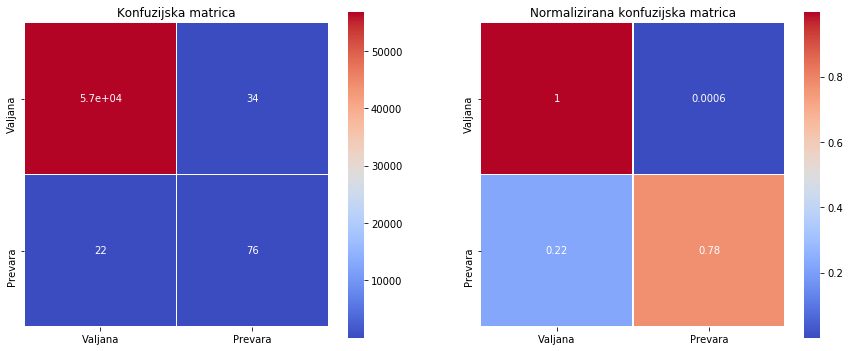

----------------------------------------------------------------------------------------------------


In [27]:
over_under_pred_bag = over_under_model_bag.predict(X_data_test)
print_everything(y_data_test, over_under_pred_bag, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

In [29]:
smote_under_bag = BaggingClassifier()

time_sm_und_bag_start = time.time()
smote_under_pipeline_bag = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_bag)
smote_under_model_bag = smote_under_pipeline_bag.fit(X_data_train, y_data_train)

training_smote_under_bag_score = cross_val_score(smote_under_pipeline_bag, X_data_train, y_data_train, cv=rskf)
time_sm_und_bag_end = time.time()
print('Bagging klasifikator na stablima odluke (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za bagging klasifikator na stablima odluke sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_bag_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening bagging klasifikatora na stablima odluke (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_bag_end-time_sm_und_bag_start, 2)) + ' seconds')

Bagging klasifikator na stablima odluke (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za bagging klasifikator na stablima odluke sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 99.81%
Vrijeme potrebno za trening bagging klasifikatora na stablima odluke (sa kombinacijom undersamplinga i SMOTE-a): 378.22 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 50.0%
	Recall score: 83.67%
	F1 score: 62.6%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.84      0.63        98

    accuracy                           1.00     56962
   macro avg       0.75      0.92      0.81     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


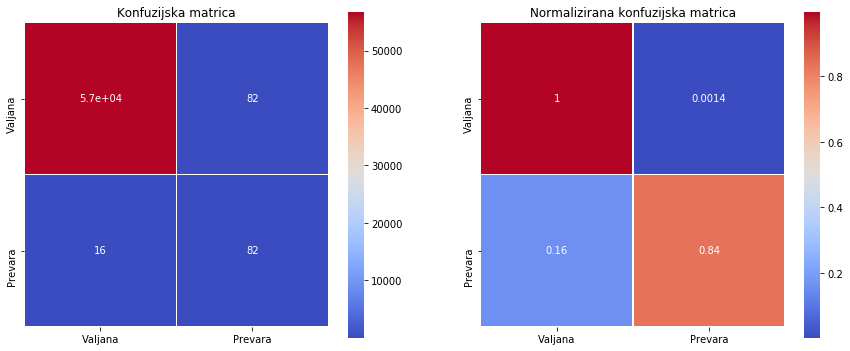

----------------------------------------------------------------------------------------------------


In [30]:
smote_under_pred_bag = smote_under_model_bag.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_bag, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Niti korištenjem bagging klasifikatora nismo dobili bolje rezultate (napomenimo samo da je kombinacija SMOTE-a i nasumičnog undersamplinga bila bolja od kombinacije nasumičnog undersamplinga i nasumičnog oversamplinga).

## Slučajne šume

In [32]:
over_under_rf = RandomForestClassifier()

time_ov_und_rf_start = time.time()
over_under_pipeline_rf = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_rf)
over_under_model_rf = over_under_pipeline_rf.fit(X_data_train, y_data_train)

training_over_under_rf_score = cross_val_score(over_under_pipeline_rf, X_data_train, y_data_train, cv=rskf)
time_ov_und_rf_end = time.time()
print('Slučajne šume (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za slučajne šume sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_rf_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening slučajnih šuma (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_rf_end-time_ov_und_rf_start, 2)) + ' seconds')

Slučajne šume (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za slučajne šume sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 99.94%
Vrijeme potrebno za trening slučajnih šuma (sa kombinacijom undersamplinga i oversamplinga): 431.6 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 88.3%
	Recall score: 84.69%
	F1 score: 86.46000000000001%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


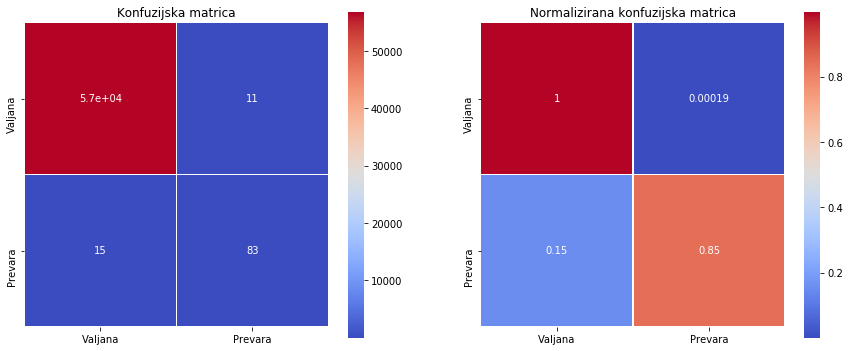

----------------------------------------------------------------------------------------------------


In [33]:
over_under_pred_rf = over_under_model_rf.predict(X_data_test)
print_everything(y_data_test, over_under_pred_rf, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Korištenjem nasumičnog undersamplinga i oversamplinga kod slučajnih šuma vidimo značajan napredak. Odnosno dobili smo nešto bolje rezultate nego samim oversamplingom ili undersamplingom. Vidimo da je broj pogrešno klasificiranih valjanih transakcija jako malen (samo 11), dok je broj ispravno klasificiranih prevara dosta veći nego kod samog oversamplinga ili bez ikakvog samplinga (tad je bilo 78, sad je 83).   

In [35]:
smote_under_rf = RandomForestClassifier()

time_sm_und_rf_start = time.time()
smote_under_pipeline_rf = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_rf)
smote_under_model_rf = smote_under_pipeline_rf.fit(X_data_train, y_data_train)

training_smote_under_rf_score = cross_val_score(smote_under_pipeline_rf, X_data_train, y_data_train, cv=rskf)
time_sm_und_rf_end = time.time()
print('Slučajne šume (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za slučajne šume sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_rf_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening slučajnih šuma (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_rf_end-time_sm_und_rf_start, 2)) + ' seconds')

Slučajne šume (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za slučajne šume sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 99.91%
Vrijeme potrebno za trening slučajnih šuma (sa kombinacijom undersamplinga i SMOTE-a): 440.13 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 73.5%
	Recall score: 87.76%
	F1 score: 80.0%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.88      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


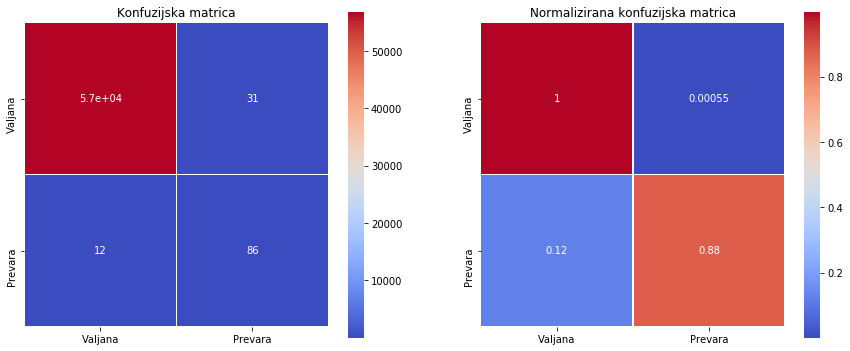

----------------------------------------------------------------------------------------------------


In [36]:
smote_under_pred_rf = smote_under_model_rf.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_rf, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Kada umjesto nasumičnog oversamplinga koristimo SMOTE uz nasumični undersampling dobijamo još bolje rezultate. Sada je čak 86 ispravno klasificiranih prevara (bilo je 83), dok broj pogrešno klasificiranih valjanih transakcija nije značajno veći (31, a bilo je 11).

## Lagani anasmabli

In [38]:
over_under_ee = EasyEnsembleClassifier()

time_ov_und_ee_start = time.time()
over_under_pipeline_ee = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_ee)
over_under_model_ee = over_under_pipeline_ee.fit(X_data_train, y_data_train)

training_over_under_ee_score = cross_val_score(over_under_pipeline_ee, X_data_train, y_data_train, cv=rskf)
time_ov_und_ee_end = time.time()
print('Lagani anasambl (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za lagani ansambl sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_ee_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening laganih ansambala (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_ee_end-time_ov_und_ee_start, 2)) + ' seconds')

Lagani anasambl (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za lagani ansambl sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 98.83999999999999%
Vrijeme potrebno za trening laganih ansambala (sa kombinacijom undersamplinga i oversamplinga): 1382.55 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 9.75%
	Recall score: 91.84%
	F1 score: 17.630000000000003%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.92      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


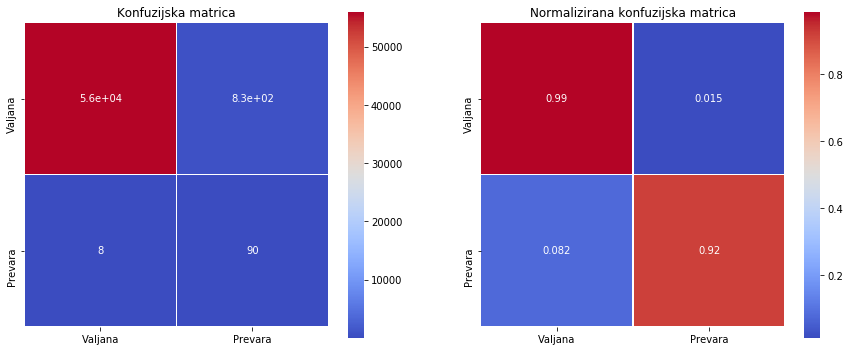

----------------------------------------------------------------------------------------------------


In [39]:
over_under_pred_ee = over_under_model_ee.predict(X_data_test)
print_everything(y_data_test, over_under_pred_ee, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

In [43]:
smote_under_ee = EasyEnsembleClassifier()

time_sm_und_ee_start = time.time()
smote_under_pipeline_ee = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_ee)
smote_under_model_ee = smote_under_pipeline_ee.fit(X_data_train, y_data_train)

training_smote_under_ee_score = cross_val_score(smote_under_pipeline_ee, X_data_train, y_data_train, cv=rskf)
time_sm_und_ee_end = time.time()
print('Lagani anasambl (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za lagani ansambl sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_ee_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening laganih ansambala (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_ee_end-time_sm_und_ee_start, 2)) + ' seconds')

Lagani anasambl (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za lagani ansambl sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 98.04%
Vrijeme potrebno za trening laganih ansambala (sa kombinacijom undersamplinga i SMOTE-a): 1899.46 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 6.890000000000001%
	Recall score: 92.86%
	F1 score: 12.83%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962


----------------------------------------------------------------------------------------------------


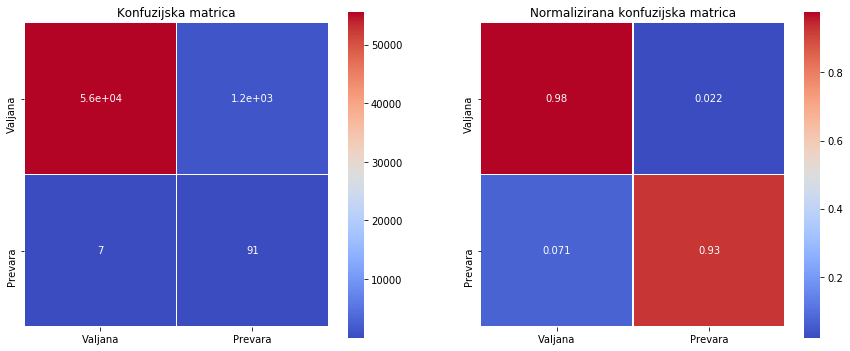

----------------------------------------------------------------------------------------------------


In [45]:
smote_under_pred_ee = smote_under_model_ee.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_ee, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Korištenjem laganih ansambala dobivamo nešto drugačije rezultate. Konkretno, iako je broj ispravno klasificiranih prevara jako velik, također je i broj pogrešno klasificiranih valjanih transakcija.

## Metoda najbližih susjeda

In [46]:
over_under_knn = KNeighborsClassifier()

time_ov_und_knn_start = time.time()
over_under_pipeline_knn = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_knn)
over_under_model_knn = over_under_pipeline_knn.fit(X_data_train, y_data_train)

training_over_under_knn_score = cross_val_score(over_under_pipeline_knn, X_data_train, y_data_train, cv=rskf)
time_ov_und_knn_end = time.time()
print('Metoda najbližih susjeda (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za metodu najbližih susjeda sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_knn_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening metode najbližih susjeda (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_knn_end-time_ov_und_knn_start, 2)) + ' seconds')

Metoda najbližih susjeda (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za metodu najbližih susjeda sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 98.82%
Vrijeme potrebno za trening metode najbližih susjeda (sa kombinacijom undersamplinga i oversamplinga): 1335.26 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 36.25%
	Recall score: 88.78%
	F1 score: 51.480000000000004%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.89      0.51        98

    accuracy                           1.00     56962
   macro avg       0.68      0.94      0.76     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


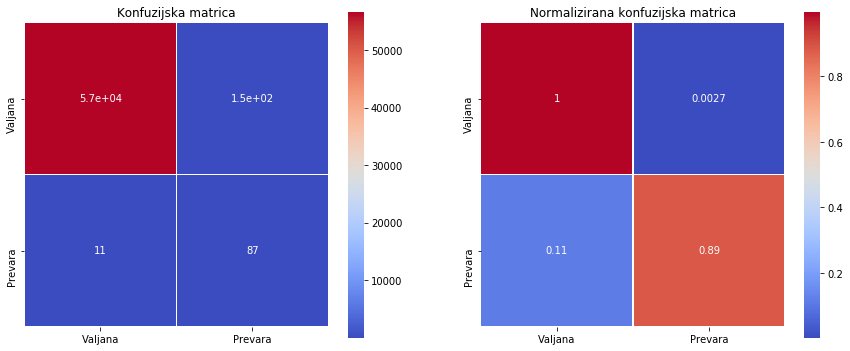

----------------------------------------------------------------------------------------------------


In [47]:
over_under_pred_knn = over_under_model_knn.predict(X_data_test)
print_everything(y_data_test, over_under_pred_knn, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

In [49]:
smote_under_knn = KNeighborsClassifier()

time_sm_und_knn_start = time.time()
smote_under_pipeline_knn = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_knn)
smote_under_model_knn = smote_under_pipeline_knn.fit(X_data_train, y_data_train)

training_smote_under_knn_score = cross_val_score(smote_under_pipeline_knn, X_data_train, y_data_train, cv=rskf)
time_sm_und_knn_end = time.time()
print('Metoda najbližih susjeda (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za metodu najbližih susjeda sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_knn_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening metode najbližih susjeda (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_knn_end-time_sm_und_knn_start, 2)) + ' seconds')

Metoda najbližih susjeda (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za metodu najbližih susjeda sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 98.03%
Vrijeme potrebno za trening metode najbližih susjeda (sa kombinacijom undersamplinga i SMOTE-a): 1846.17 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 19.78%
	Recall score: 89.8%
	F1 score: 32.41%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.20      0.90      0.32        98

    accuracy                           0.99     56962
   macro avg       0.60      0.95      0.66     56962
weighted avg       1.00      0.99      1.00     56962


----------------------------------------------------------------------------------------------------


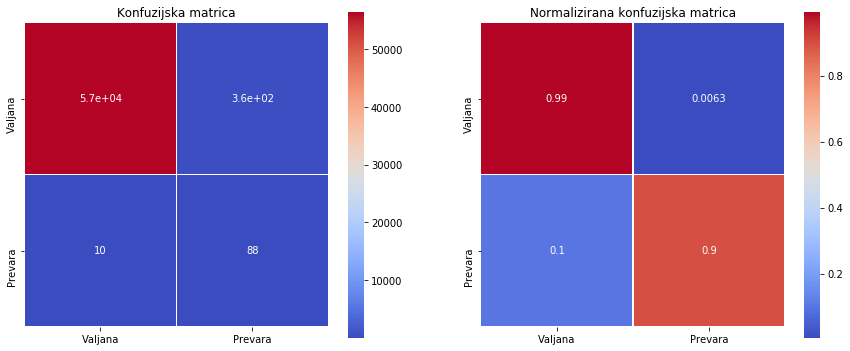

----------------------------------------------------------------------------------------------------


In [50]:
smote_under_pred_knn = smote_under_model_knn.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_knn, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Korištenjem metode najbližih susjeda također dobivamo vrlo dobre rezultate. Kad koristimo nasumični oversampling i undersampling model koji dobijemo ispravno klasificira čak 87 prevara, dok je broj pogrešno klasificiranih valjanih transakcija oko 150. Ako umjesto nasumičnog oversamplinga koristimo SMOTE, model ispravno klasificira 88 prevara (1 više nego u prošlom slučaju), ali i oko 360 pogrešno klasificiranih valjanih transakcija (200tinjak više nego prije). 

## Metoda potpornih vektora

In [6]:
over_under_svc = SVC()

time_ov_und_svc_start = time.time()
over_under_pipeline_svc = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_svc)
over_under_model_svc = over_under_pipeline_svc.fit(X_data_train, y_data_train)

training_over_under_svc_score = cross_val_score(over_under_pipeline_svc, X_data_train, y_data_train, cv=rskf)
time_ov_und_svc_end = time.time()
print('Metoda potpornih vektora (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za metodu potpornih vektora sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_svc_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening metode potpornih vektora (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_svc_end-time_ov_und_svc_start, 2)) + ' seconds')

Metoda potpornih vektora (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za metodu potpornih vektora sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 99.57000000000001%
Vrijeme potrebno za trening metode potpornih vektora (sa kombinacijom undersamplinga i oversamplinga): 574.15 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 33.72%
	Recall score: 89.8%
	F1 score: 49.03%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.90      0.49        98

    accuracy                           1.00     56962
   macro avg       0.67      0.95      0.74     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


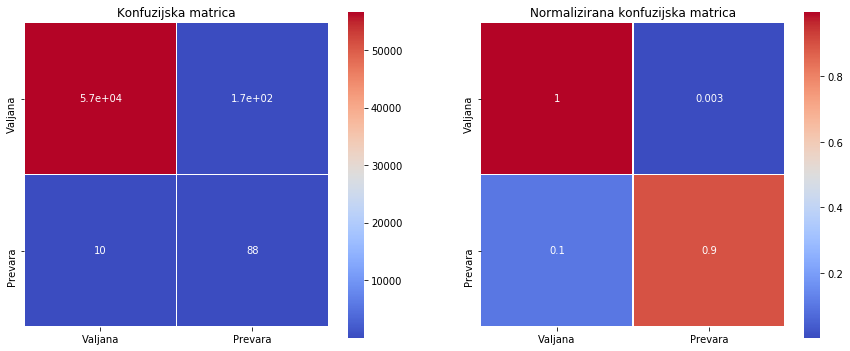

----------------------------------------------------------------------------------------------------


In [7]:
over_under_pred_svc = over_under_model_svc.predict(X_data_test)
print_everything(y_data_test, over_under_pred_svc, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

In [9]:
smote_under_svc = SVC()

time_sm_und_svc_start = time.time()
smote_under_pipeline_svc = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_svc)
smote_under_model_svc = smote_under_pipeline_svc.fit(X_data_train, y_data_train)

training_smote_under_svc_score = cross_val_score(smote_under_pipeline_svc, X_data_train, y_data_train, cv=rskf)
time_sm_und_svc_end = time.time()
print('Metoda potpornih vektora (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za metodu potpornih vektora sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_svc_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening metode potpornih vektora (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_svc_end-time_sm_und_svc_start, 2)) + ' seconds')

Metoda potpornih vektora (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za metodu potpornih vektora sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 99.49%
Vrijeme potrebno za trening metode potpornih vektora (sa kombinacijom undersamplinga i SMOTE-a): 566.52 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 29.73%
	Recall score: 89.8%
	F1 score: 44.67%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.90      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.95      0.72     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


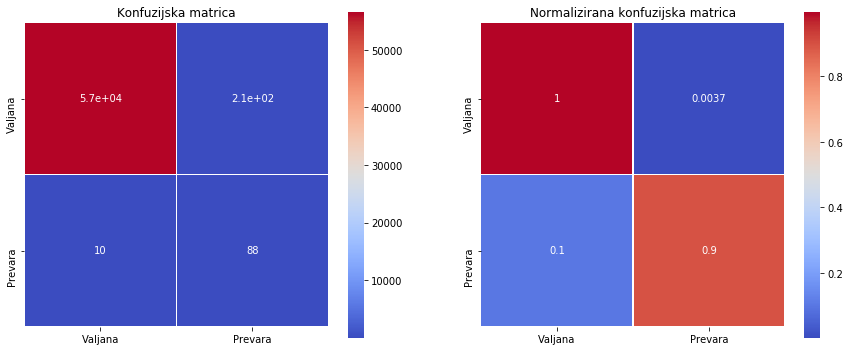

----------------------------------------------------------------------------------------------------


In [10]:
smote_under_pred_svc = smote_under_model_svc.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_svc, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Kada koristimo metodu potpornih vektora kao klasifikator dobivamo nijansu bolje rezultate nego kod metode najbližih susjeda. Vidimo da je kod kombinacije nasumičnog undersamplinga i nasumičnog oversamplinga razlika u broju pogrešno klasificiranih valjanih transakcija jako mala (ovdje je svega oko 20 više), dok smo ispravno klasificirali 1 prevaru više.

## Boosting

Kao i u prethodnim bilježnicama koristimo sljedeće boosting tehinke:
<ol>
    <li>XGB (eXtreme Gradient Boosting)</li>
    <li>LGBM (Light Gradient Boosting Machine)</li>
    <li>CatBoost (Categorical Boosting)</li>
    <li>AdaBoost (Adaptive Boosting)</li>
</ol>

### XGB

In [11]:
over_under_xgb = XGBClassifier()

time_ov_und_xgb_start = time.time()
over_under_pipeline_xgb = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_xgb)
over_under_model_xgb = over_under_pipeline_xgb.fit(X_data_train, y_data_train)

training_over_under_xgb_score = cross_val_score(over_under_pipeline_xgb, X_data_train, y_data_train, cv=rskf)
time_ov_und_xgb_end = time.time()
print('XGB (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za XGB sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_xgb_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening XGBa (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_xgb_end-time_ov_und_xgb_start, 2)) + ' seconds')

XGB (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za XGB sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 99.71%
Vrijeme potrebno za trening XGBa (sa kombinacijom undersamplinga i oversamplinga): 258.04 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 38.940000000000005%
	Recall score: 89.8%
	F1 score: 54.32%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.90      0.54        98

    accuracy                           1.00     56962
   macro avg       0.69      0.95      0.77     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


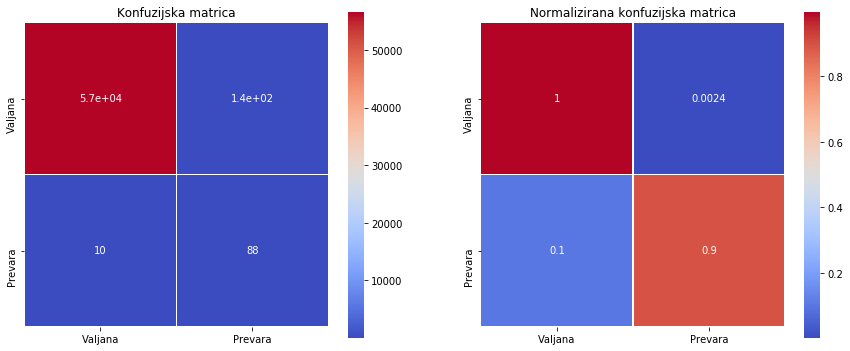

----------------------------------------------------------------------------------------------------


In [12]:
over_under_pred_xgb = over_under_model_xgb.predict(X_data_test)
print_everything(y_data_test, over_under_pred_xgb, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Koristeći XGB kao klasifikator dobijamo još bolje rezultate nego metodom potpornih vektora. Ovaj model ispravno klasificira 88 prevara (jednako kao SVC, 1 više od KNN) i pritom manje griješi nego SVC i KNN kod klasifikacije valjanih transakcija (xgb - oko 140 pogrešno klasificiranih, svc oko 170, knn oko 150). 

In [16]:
smote_under_xgb = XGBClassifier()

time_sm_und_xgb_start = time.time()
smote_under_pipeline_xgb = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_xgb)
smote_under_model_xgb = smote_under_pipeline_xgb.fit(X_data_train, y_data_train)

training_smote_under_xgb_score = cross_val_score(smote_under_pipeline_xgb, X_data_train, y_data_train, cv=rskf)
time_sm_und_xgb_end = time.time()
print('XGB (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za XGB sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_xgb_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening XGBa (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_xgb_end-time_sm_und_xgb_start, 2)) + ' seconds')

XGB (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za XGB sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 99.47%
Vrijeme potrebno za trening XGBa (sa kombinacijom undersamplinga i SMOTE-a): 217.81 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 26.19%
	Recall score: 89.8%
	F1 score: 40.550000000000004%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.90      0.41        98

    accuracy                           1.00     56962
   macro avg       0.63      0.95      0.70     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


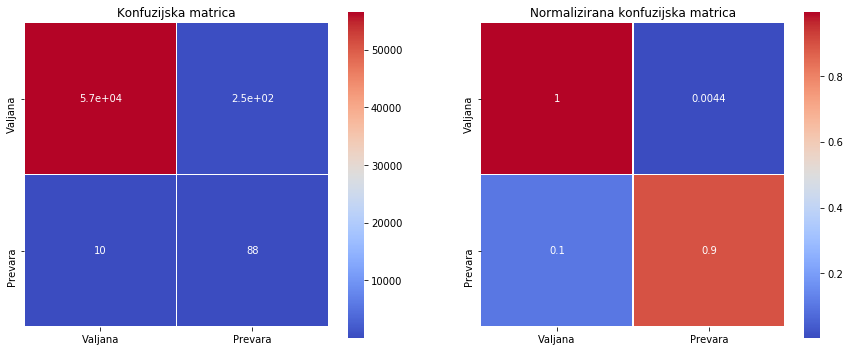

----------------------------------------------------------------------------------------------------


In [17]:
smote_under_pred_xgb = smote_under_model_xgb.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_xgb, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Kada umjesto nasumičnog oversamplinga koristimo SMOTE, dobijamo nešto slabije rezultate (no i dalje jako dobre).

### LGBM

In [18]:
over_under_lgbm = LGBMClassifier()

time_ov_und_lgbm_start = time.time()
over_under_pipeline_lgbm = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_lgbm)
over_under_model_lgbm = over_under_pipeline_lgbm.fit(X_data_train, y_data_train)

training_over_under_lgbm_score = cross_val_score(over_under_pipeline_lgbm, X_data_train, y_data_train, cv=rskf)
time_ov_und_lgbm_end = time.time()
print('LGBM (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za LGBM sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_lgbm_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening LGBMa (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_lgbm_end-time_ov_und_lgbm_start, 2)) + ' seconds')

LGBM (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za LGBM sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 99.92999999999999%
Vrijeme potrebno za trening LGBMa (sa kombinacijom undersamplinga i oversamplinga): 32.54 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 81.89999999999999%
	Recall score: 87.76%
	F1 score: 84.73%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.88      0.85        98

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


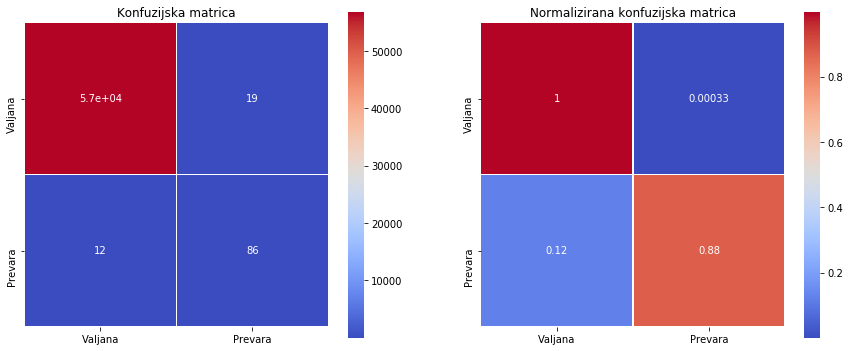

----------------------------------------------------------------------------------------------------


In [19]:
over_under_pred_lgbm = over_under_model_lgbm.predict(X_data_test)
print_everything(y_data_test, over_under_pred_lgbm, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Sa LGBM-om kao klasifikatorom također dobivamo vrlo dobre rezultate (i preciznost, i osjetljivost i f1-mjera su iznad 80%). Primjetimo da je za razliku od XGBa ovdje nešto manje ispravno klasificiranih prevara (86), dok je i broj pogrešno klasificiranih valjanih transakcija poprilično manji (samo 19).

In [26]:
smote_under_lgbm = LGBMClassifier()

time_sm_und_lgbm_start = time.time()
smote_under_pipeline_lgbm = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_lgbm)
smote_under_model_lgbm = smote_under_pipeline_lgbm.fit(X_data_train, y_data_train)

training_smote_under_lgbm_score = cross_val_score(smote_under_pipeline_lgbm, X_data_train, y_data_train, cv=rskf)
time_sm_und_lgbm_end = time.time()
print('LGBM (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za LGBM sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_lgbm_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening LGBMa (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_lgbm_end-time_sm_und_lgbm_start, 2)) + ' seconds')

LGBM (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za LGBM sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 99.83999999999999%
Vrijeme potrebno za trening LGBMa (sa kombinacijom undersamplinga i SMOTE-a): 33.59 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 56.489999999999995%
	Recall score: 88.78%
	F1 score: 69.05%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.56      0.89      0.69        98

    accuracy                           1.00     56962
   macro avg       0.78      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


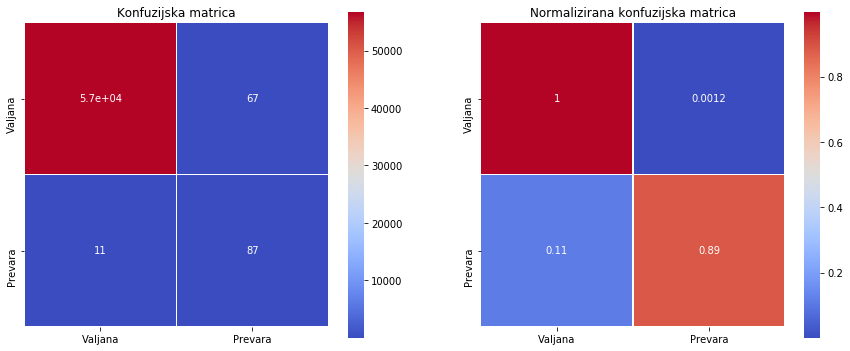

----------------------------------------------------------------------------------------------------


In [27]:
smote_under_pred_lgbm = smote_under_model_lgbm.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_lgbm, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

Kada umjesto nasumičnog oversamplinga koristimo SMOTE, LGBMom dobivamo 1 ispravno klasificiranu prevaru više, ali je i 38 više pogrešno klasificiranih valjanih transakcija.

### CatBoost

In [23]:
over_under_cat = CatBoostClassifier(silent=True)

time_ov_und_cat_start = time.time()
over_under_pipeline_cat = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_cat)
over_under_model_cat = over_under_pipeline_cat.fit(X_data_train, y_data_train)

training_over_under_cat_score = cross_val_score(over_under_pipeline_cat, X_data_train, y_data_train, cv=rskf)
time_ov_und_cat_end = time.time()
print('CatBoost (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za CatBoost sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_cat_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening CatBoosta (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_cat_end-time_ov_und_cat_start, 2)) + ' seconds')

CatBoost (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za CatBoost sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 99.91%
Vrijeme potrebno za trening CatBoosta (sa kombinacijom undersamplinga i oversamplinga): 416.49 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 74.56%
	Recall score: 86.72999999999999%
	F1 score: 80.19%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.87      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


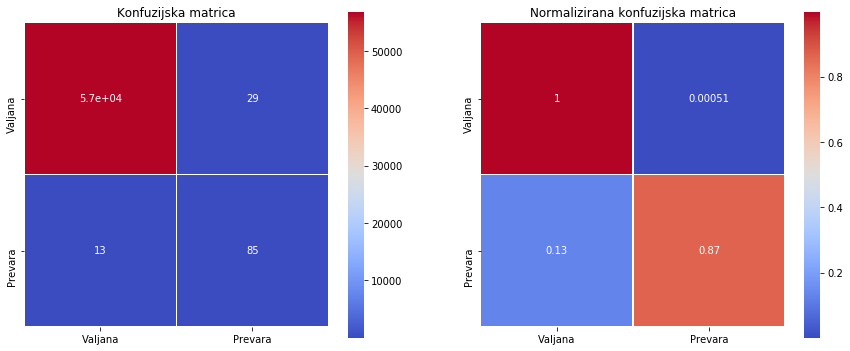

----------------------------------------------------------------------------------------------------


In [24]:
over_under_pred_cat = over_under_model_cat.predict(X_data_test)
print_everything(y_data_test, over_under_pred_cat, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

In [28]:
smote_under_cat = CatBoostClassifier(silent=True)

time_sm_und_cat_start = time.time()
smote_under_pipeline_cat = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_cat)
smote_under_model_cat = smote_under_pipeline_cat.fit(X_data_train, y_data_train)

training_smote_under_cat_score = cross_val_score(smote_under_pipeline_cat, X_data_train, y_data_train, cv=rskf)
time_sm_und_cat_end = time.time()
print('CatBoost (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za CatBoost sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_cat_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening CatBoosta (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_cat_end-time_sm_und_cat_start, 2)) + ' seconds')

CatBoost (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za CatBoost sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 99.83999999999999%
Vrijeme potrebno za trening CatBoosta (sa kombinacijom undersamplinga i SMOTE-a): 429.54 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 57.330000000000005%
	Recall score: 87.76%
	F1 score: 69.35%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.57      0.88      0.69        98

    accuracy                           1.00     56962
   macro avg       0.79      0.94      0.85     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


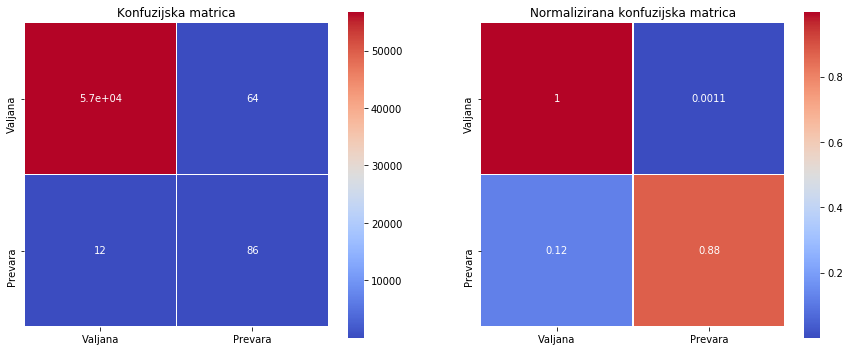

----------------------------------------------------------------------------------------------------


In [29]:
smote_under_pred_cat = smote_under_model_cat.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_cat, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

CatBoostom dobivamo vrlo slične rezultate kao i LGBMom, doduše malo slabije (bez obzira koristimo li nasumični oversampling ili SMOTE).

### AdaBoost

In [31]:
over_under_ada = AdaBoostClassifier()

time_ov_und_ada_start = time.time()
over_under_pipeline_ada = imbalanced_make_pipeline(over_sampler, under_sampler, over_under_ada)
over_under_model_ada = over_under_pipeline_ada.fit(X_data_train, y_data_train)

training_over_under_ada_score = cross_val_score(over_under_pipeline_ada, X_data_train, y_data_train, cv=rskf)
time_ov_und_ada_end = time.time()
print('AdaBoost (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)')

print('Rezultat treniranja za AdaBoost sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: ' 
     + str(round(training_over_under_ada_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening AdaBoosta (sa kombinacijom undersamplinga i oversamplinga): ' + 
      str(round(time_ov_und_ada_end-time_ov_und_ada_start, 2)) + ' seconds')

AdaBoost (sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga)
Rezultat treniranja za AdaBoost sa kombinacijom nasumičnog undersamplinga i nasumičnog oversamplinga: 99.05000000000001%
Vrijeme potrebno za trening AdaBoosta (sa kombinacijom undersamplinga i oversamplinga): 280.14 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 13.120000000000001%
	Recall score: 91.84%
	F1 score: 22.96%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.92      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


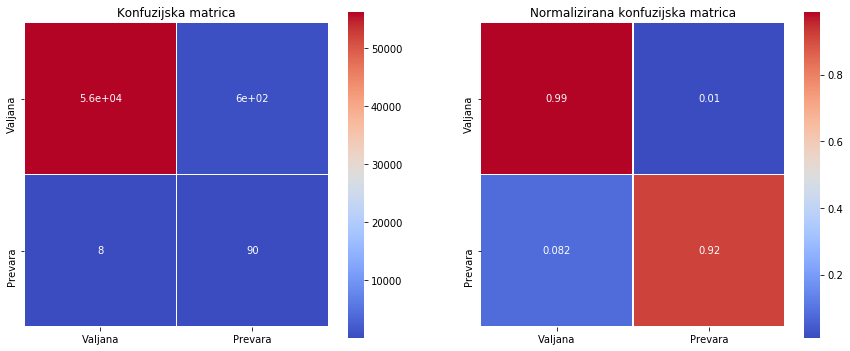

----------------------------------------------------------------------------------------------------


In [32]:
over_under_pred_ada = over_under_model_ada.predict(X_data_test)
print_everything(y_data_test, over_under_pred_ada, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

In [34]:
smote_under_ada = AdaBoostClassifier()

time_sm_und_ada_start = time.time()
smote_under_pipeline_ada = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_ada)
smote_under_model_ada = smote_under_pipeline_ada.fit(X_data_train, y_data_train)

training_smote_under_ada_score = cross_val_score(smote_under_pipeline_ada, X_data_train, y_data_train, cv=rskf)
time_sm_und_ada_end = time.time()
print('AdaBoost (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)')

print('Rezultat treniranja za AdaBoost sa kombinacijom nasumičnog undersamplinga i SMOTE-a: ' 
     + str(round(training_smote_under_ada_score.mean(), 4) * 100) + '%')
print('Vrijeme potrebno za trening AdaBoosta (sa kombinacijom undersamplinga i SMOTE-a): ' + 
      str(round(time_sm_und_ada_end-time_sm_und_ada_start, 2)) + ' seconds')

AdaBoost (sa kombinacijom nasumičnog undersamplinga i SMOTE-a)
Rezultat treniranja za AdaBoost sa kombinacijom nasumičnog undersamplinga i SMOTE-a: 98.68%
Vrijeme potrebno za trening AdaBoosta (sa kombinacijom undersamplinga i SMOTE-a): 321.65 seconds


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 10.02%
	Recall score: 90.82000000000001%
	F1 score: 18.05%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.91      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


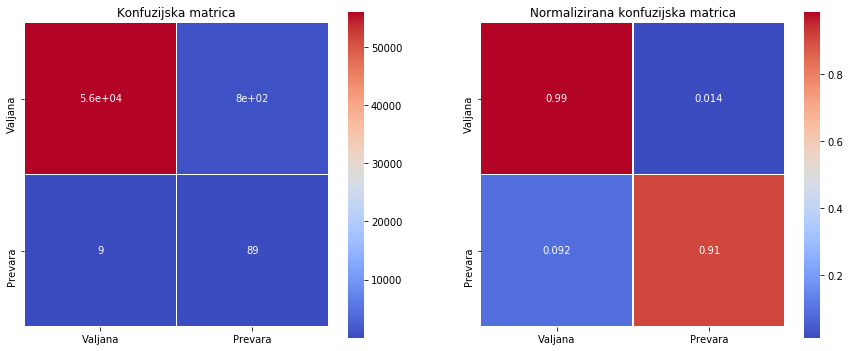

----------------------------------------------------------------------------------------------------


In [35]:
smote_under_pred_ada = smote_under_model_ada.predict(X_data_test)
print_everything(y_data_test, smote_under_pred_ada, y_data_test_non_fraud_num, y_data_test_fraud_num, None, False)

AdaBoostom dobijamo najviše ispravno klasificiranih prevara od svih boosting algoritama, ali i najviše pogrešno klasificiranih valjanih transakcija (kod nasumičnog oversamplinga oko 600, kod SMOTEa oko 800). 